![.](https://i.imgur.com/bBChS0A.jpeg)
# Exploratory Data Analysis of Used Cars in USA 

### Introduction

In this project analysis, we will analyze the US Used Cars Dataset from Kaggle website. This dataset has over 3 million rows data with 66 columns. We'll use 17 columns for our exercise.

The goal of this project is to get a overview and also a better understanding of the US used car market by applying some data analysis & visualization skills to the real-world dataset.

Here are the following steps that we need to follow:

* Downloading a dataset from an Kaggle source.
* Data preparation and cleaning
* Open-ended exploratory analysis and visualization.
* Asking and answering interesting questions.
* Summarizing inferences and conclusion.


Let's look at the some of the columns we are going to analyze and look at.

* **listing_color**: Dominant color group from the exterior color.
* **listing_id**: Listing id from the website.
* **longitude**: Longitude from the geolocation of the dealership.
* **make_name**: Make of the car.
* **maximum_seating**: Seating capacity of the car.
* **engine_type**: The engine configuration. Eg: I4, V6, etc.
* **price**: price of the vehicle.
* **seller_rating**: Rating of the seller who advertised the vehicle.
* **year**: Car manufacturing year. 
* **fuel_type**: Dominant type of fuel ingested by the vehicle.
* **vin**: Vehicle Identification Number is a unique encoded string for every vehicle.
* **body_type**: Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
* **city**: city where the car is listed. Eg: Houston, San Antonio, etc.
* **daysonmarket**: Days since the vehicle was first listed on the website.
* **franchise_dealer**: Whether the dealer is a franchise dealer.
* **mileage**: Mileage of the car when it was advertised.
* **is_new**: If True means the vehicle was launched less than 2 years ago.
* **latitude**: Latitude from the geolocation of the dealership.
* **listeddate**: The date the vehicle was listed on the website. Does not make daysonmarket obsolete. The prices is dayson_market days after the listed date.





### What is Exploratory data analysis?

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 

#### There are four primary types of EDA:

- Univariate non-graphical: This form of data analysis is where the data is being analyzed consists of just one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

- Univariate graphical: Non-graphical methods don’t give us a full picture of the data. Graphical methods are necessary. Common types of univariate graphics include: Stem-and-leaf plots, which show all data values and the shape of the distribution. 

- Multivariate nongraphical: Multivariate data arises from more than 1 variable. Multivariate non-graphical EDA techniques generally show the relationship between two or more variables of the data through cross-tabulation or statistics.

- Multivariate graphical: Multivariate data uses graphics to display relationships between 2 or more data sets. The most used graphic is a grouped bar plot or bar chart with each group representing one level of one of the variables and each bar within a group representing the levels of the other variable.


In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="eda-project-used-cars")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/eda-project-used-cars


'https://jovian.ai/sanjaynycws/eda-project-used-cars'

## Importing the Libraries:

In [5]:
!pip install opendatasets --upgrade --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import opendatasets as od
import folium
import plotly.express as px
%matplotlib inline
sns.set_style("whitegrid")

## Downloading the dataset from Kaggle

## Data Preparation and Cleaning
- Load the file using Pandas
- Look at some information about the data & the columns
- Fix any missing or incorrect values

We are going to download Kaggle dataset using `opendatasets` library. `opendatasets` is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python syntax.

In [6]:
dataset_url = 'https://www.kaggle.com/ananaymital/us-used-cars-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjayveeraragavulu
Your Kaggle Key: ··········


100%|██████████| 2.13G/2.13G [00:17<00:00, 129MB/s]


In [7]:
import os
data_dir = 'us-used-cars-dataset'
os.listdir(data_dir)

['used_cars_data.csv']

In [63]:
%%time
usedcars_csv = '/content/us-used-cars-dataset/used_cars_data.csv'
usedcars_df = pd.read_csv(usedcars_csv,  low_memory=False, nrows=1000000)

CPU times: user 44.6 s, sys: 10.1 s, total: 54.7 s
Wall time: 1min


Approximately, It took 39.9seconds to load 1 Million rows of data from this dataset. We are unable to load the entire 3mn rows of data here due to the capability limits of Colab. Yet, our analysis would speak for the sample but it would resemble the results of what 3mn of data would look like. 

In [8]:
dataset_name = './us-used-cars-dataset/used_cars_data.csv'

In [9]:
df = pd.read_csv(dataset_name, usecols=['vin', 'price','seller_rating','year','fuel_type','body_type','city','listing_color','longitude', 'make_name','maximum_seating','engine_type','daysonmarket','mileage','is_new',
                                         'latitude','listed_date'
                                         ])

In [10]:
# preview of the dataset
df.head(10)

,vin,body_type,city,daysonmarket,engine_type,fuel_type,is_new,latitude,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,price,seller_rating,year
0,ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,I4,Gasoline,True,18.3988,2019-04-06,YELLOW,-66.1582,Jeep,5 seats,7.0,23141.0,2.8,2019
1,SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,I4,Gasoline,True,18.4439,2020-02-15,BLACK,-66.0785,Land Rover,7 seats,8.0,46500.0,3.0,2020
2,JF1VA2M67G9829723,Sedan,Guaynabo,1233,H4,Gasoline,False,18.3467,2017-04-25,UNKNOWN,-66.1098,Subaru,5 seats,NaN,46995.0,NaN,2016
3,SALRR2RV0L2433391,SUV / Crossover,San Juan,196,V6,Gasoline,True,18.4439,2020-02-26,GRAY,-66.0785,Land Rover,7 seats,11.0,67430.0,3.0,2020
4,SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,I4,Gasoline,True,18.4439,2020-04-25,BLACK,-66.0785,Land Rover,7 seats,7.0,48880.0,3.0,2020
5,SALYK2EX1LA261711,SUV / Crossover,San Juan,242,I4,Gasoline,True,18.4439,2020-01-11,UNKNOWN,-66.0785,Land Rover,5 seats,12.0,66903.0,3.0,2020
6,3MZBPABL6KM107908,Sedan,Bayamon,447,I4,Gasoline,True,18.3988,2019-06-20,SILVER,-66.1582,Mazda,5 seats,14.0,23695.0,2.8,2019
7,SALYK2EX5LA275434,SUV / Crossover,San Juan,70,I4,Gasoline,True,18.4439,2020-07-01,WHITE,-66.0785,Land Rover,5 seats,11.0,68520.0,3.0,2020
8,SALCJ2FX6LH858128,SUV / Crossover,San Juan,196,I4,Gasoline,True,18.4439,2020-02-26,GRAY,-66.0785,Land Rover,7 seats,8.0,51245.0,3.0,2020
9,SALZL2GX4LH007593,SUV / Crossover,San Juan,510,I4,Gasoline,False,18.4439,2019-04-18,WHITE,-66.0785,Land Rover,5 seats,254.0,84399.0,3.0,2020


The Original dataset conatins 66 columns but I am selecting only 17 columns for this project purposes. The dataset contains little over 3 million real world used cars details.

In [11]:
#Let's view some basic information about the data frame.
df.shape 

(3000040, 17)

The above Dataframe has just over 3 million data records in 17 columns. Now, let's check if there are any duplicate records in the dataframe to delete it. 

In [12]:
df.isnull().sum() #isnull() function along with sum() gives a count of the missing values from each column

vin                     0
body_type           13543
city                    0
daysonmarket            0
engine_type        100581
fuel_type           82724
is_new                  0
latitude                0
listed_date             0
listing_color           0
longitude               0
make_name               0
maximum_seating    159269
mileage            144387
price                   0
seller_rating       40872
year                    0
dtype: int64

In [13]:
df.duplicated().sum() #Total duplicates

40

In [14]:
df.drop_duplicates() #dropping duplicate from the data frame

,vin,body_type,city,daysonmarket,engine_type,fuel_type,is_new,latitude,listed_date,listing_color,longitude,make_name,maximum_seating,mileage,price,seller_rating,year
0,ZACNJABB5KPJ92081,SUV / Crossover,Bayamon,522,I4,Gasoline,True,18.3988,2019-04-06,YELLOW,-66.1582,Jeep,5 seats,7.0,23141.0,2.800000,2019
1,SALCJ2FX1LH858117,SUV / Crossover,San Juan,207,I4,Gasoline,True,18.4439,2020-02-15,BLACK,-66.0785,Land Rover,7 seats,8.0,46500.0,3.000000,2020
2,JF1VA2M67G9829723,Sedan,Guaynabo,1233,H4,Gasoline,False,18.3467,2017-04-25,UNKNOWN,-66.1098,Subaru,5 seats,NaN,46995.0,NaN,2016
3,SALRR2RV0L2433391,SUV / Crossover,San Juan,196,V6,Gasoline,True,18.4439,2020-02-26,GRAY,-66.0785,Land Rover,7 seats,11.0,67430.0,3.000000,2020
4,SALCJ2FXXLH862327,SUV / Crossover,San Juan,137,I4,Gasoline,True,18.4439,2020-04-25,BLACK,-66.0785,Land Rover,7 seats,7.0,48880.0,3.000000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000035,2GNAXJEV0J6261526,SUV / Crossover,Fairfield,16,I4,Gasoline,False,38.2418,2020-08-27,SILVER,-122.0830,Chevrolet,5 seats,41897.0,17998.0,4.272727,2018
3000036,1GNERFKW0LJ225508,SUV / Crossover,Vallejo,171,V6,Gasoline,True,38.1102,2020-03-25,BLACK,-122.2030,Chevrolet,8 seats,5.0,36490.0,4.533333,2020
3000037,3FA6P0HD3GR134062,Sedan,Napa,91,NaN,NaN,False,38.2873,2020-06-13,GRAY,-122.2750,Ford,5 seats,57992.0,12990.0,4.142857,2016
3000038,SAJAJ4BNXHA968809,Sedan,Fairfield,11,I4 Diesel,Diesel,False,38.2418,2020-09-01,GREEN,-122.0830,Jaguar,5 seats,27857.0,26998.0,4.272727,2017


In [15]:
df.info() #Print a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   vin              object 
 1   body_type        object 
 2   city             object 
 3   daysonmarket     int64  
 4   engine_type      object 
 5   fuel_type        object 
 6   is_new           bool   
 7   latitude         float64
 8   listed_date      object 
 9   listing_color    object 
 10  longitude        float64
 11  make_name        object 
 12  maximum_seating  object 
 13  mileage          float64
 14  price            float64
 15  seller_rating    float64
 16  year             int64  
dtypes: bool(1), float64(5), int64(2), object(9)
memory usage: 369.1+ MB


In [16]:
df.describe().round(3) #describe() function is used to get statistical info about numerical columns

,daysonmarket,latitude,longitude,mileage,price,seller_rating,year
count,3000040.000,3000040.000,3000040.000,2.855653e+06,3000040.000,2959168.000,3000040.000
mean,76.060,36.984,-90.642,3.114690e+04,29933.367,4.270,2017.728
std,108.884,4.997,13.906,7.458674e+04,19566.170,0.513,4.179
min,0.000,18.347,-157.928,0.000000e+00,165.000,1.000,1915.000
25%,14.000,33.509,-97.088,6.000000e+00,18451.000,4.000,2017.000
50%,35.000,37.847,-87.250,8.267000e+03,26477.000,4.341,2020.000
75%,82.000,41.006,-80.455,4.366200e+04,38220.000,4.605,2020.000
max,3599.000,61.203,-66.078,9.999999e+07,3299995.000,5.000,2021.000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [17]:
 # Converting 'listed_date' column to datetime object
 df['listed_date']=pd.to_datetime(df.listed_date)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 17 columns):
 #   Column           Dtype         
---  ------           -----         
 0   vin              object        
 1   body_type        object        
 2   city             object        
 3   daysonmarket     int64         
 4   engine_type      object        
 5   fuel_type        object        
 6   is_new           bool          
 7   latitude         float64       
 8   listed_date      datetime64[ns]
 9   listing_color    object        
 10  longitude        float64       
 11  make_name        object        
 12  maximum_seating  object        
 13  mileage          float64       
 14  price            float64       
 15  seller_rating    float64       
 16  year             int64         
dtypes: bool(1), datetime64[ns](1), float64(5), int64(2), object(8)
memory usage: 369.1+ MB


We see that by default float64 and integer64 bit datatypes are used, though the values that they have are not that large and can be stores in a 32bit datatype as well. So, We can alwaysconvert these 64bit datatypes to 32bit just in case and also to increase the speed and decrease the space that the dataset takes in.

In [ ]:
#selected_dtypes={
#     'daysonmarket' : 'int32',
#     'mileage' :'float32',
#     'latitude' : 'float32',
#     'longitude' : 'float32',
#     'price':'float32',
#     'seller_rating': 'float32',
#     'year': 'int32'
# }

In [19]:
#Let's check for missing values using df.isna() funtion. This function can detect missing values and .sum() returns the sum of the values over the particular axis.
df.isna().sum()

vin                     0
body_type           13543
city                    0
daysonmarket            0
engine_type        100581
fuel_type           82724
is_new                  0
latitude                0
listed_date             0
listing_color           0
longitude               0
make_name               0
maximum_seating    159269
mileage            144387
price                   0
seller_rating       40872
year                    0
dtype: int64

Let's convert above table into percentages and exclude any columns where missing values doesn't exist. 

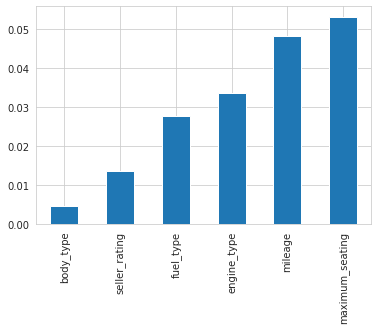

In [20]:
#Let's convert above table into percentages and exclude any columns where missing values doesn't exist.
missing_percentages = df.isnull().sum().sort_values(ascending = True) / len(df)
missing_percentages[missing_percentages != 0]
missing_percentages[missing_percentages != 0].plot(kind='bar');

There are 6 columns with the missing values. Let's analyze each column and decide how we are going to proceed with the missing values. 

### Seller_rating: This column provides the ratings of the various sellers that have listed the cars in the market. There are over 38k data records are missing for this column. The best way is to remove all the missing rows from the dataframe.

In [21]:
df['seller_rating'].value_counts()

5.000000    189321
4.000000    122922
4.500000    106764
4.666667     61967
4.333333     59993
             ...  
3.795455         1
2.794118         1
3.350000         1
4.582734         1
3.467742         1
Name: seller_rating, Length: 1817, dtype: int64

In [22]:
df['seller_rating'].unique()

array([2.8       , 3.        ,        nan, ..., 3.01851852, 4.22      ,
       4.44642857])

In [23]:
df['seller_rating'].dropna(inplace= True)

In [24]:
df = df[df['seller_rating'].notna()]

### body_type : This column has missing values for around 13K data records but random values cannot be assigned to it. We will replace missing values with 'Unknown' value using `fillna` function.

In [25]:
df['body_type'] = df['body_type'].fillna('Unknown')

### fuel_type: There are over 80K data records which are missing in this column. Since the majority of the data has a value 'Gasoline'. If we assign 'Gasoline' to replace missing values, it will not make big difference to our analysis as out of 3 million records, more than 2 million are Gasoline.

In [26]:
df.fuel_type.value_counts()

Gasoline                  2563948
Flex Fuel Vehicle          152963
Hybrid                      75356
Diesel                      43760
Biodiesel                   25482
Electric                    16339
Compressed Natural Gas        143
Propane                         6
Name: fuel_type, dtype: int64

In [27]:
df.fuel_type.fillna(value='Gasoline', inplace=True)

### engine_type: We have over 95K data records that are missing for this columns. Since engine types are more specific we unfortunately cannot assign random values and hence will replace nan values with 'Unknown'

In [28]:
df['engine_type'] = df['engine_type'].fillna('Unknown')

### mileage: 0 will replaced for the nan values. 

In [29]:
df['mileage'] = df['mileage'].fillna(0)

### maximum_seating: This column is about the maximum seating of the vehicle and has around little more than 150K missing values. Let's analyse this column to decide on how to move forward further.  

In [30]:
df.maximum_seating.value_counts()

5 seats     1850367
7 seats      300985
6 seats      297125
8 seats      198084
4 seats       80223
2 seats       34658
3 seats       29302
15 seats       5837
9 seats        3512
12 seats       1676
10 seats        532
--              486
Name: maximum_seating, dtype: int64

In [ ]:
#df['maximum_seating'].isna().sum()

In [31]:
df['maximum_seating'].unique()

array(['5 seats', '7 seats', '4 seats', '8 seats', nan, '6 seats',
       '2 seats', '9 seats', '3 seats', '--', '15 seats', '12 seats',
       '10 seats'], dtype=object)

5 seats is the most common value that appears in the data set. Around 2 million out of 3 million data records are of '5 seats'. If we assign the '5 seat' value to the missing data records, it will not spoil our analysis.

In [32]:
df['maximum_seating'].fillna(value='5 seats', inplace=True)

In [33]:
df = df[~df['maximum_seating'].isin(['--'])]
# ~(negation) symbol is used to reverse the output of our condition

In [34]:
df.maximum_seating.value_counts()

5 seats     2006748
7 seats      300985
6 seats      297125
8 seats      198084
4 seats       80223
2 seats       34658
3 seats       29302
15 seats       5837
9 seats        3512
12 seats       1676
10 seats        532
Name: maximum_seating, dtype: int64

We can see that the column includes 486 records of '--' in maximum seating. We have few options on how to deal with it.
* Leave it as it is.
* Replace it with '5 seats' value or any other value.
* Replace them with some other fixed value.
* Remove these rows.

I will choose 4th option and remove the rows before converting the column to integer type. 

In [35]:
df = df[df.maximum_seating != '--']

In [36]:
df['maximum_seating'] = df['maximum_seating'].astype(str)

In [37]:
df['maximum_seating'].astype(str)

0          5 seats
1          7 seats
3          7 seats
4          7 seats
5          5 seats
            ...   
3000035    5 seats
3000036    8 seats
3000037    5 seats
3000038    5 seats
3000039    7 seats
Name: maximum_seating, Length: 2958682, dtype: object

In [38]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/eda-project-used-cars


'https://jovian.ai/sanjaynycws/eda-project-used-cars'

# Exploratory Analysis and Visualization

The following points must be kept in mind respective to the correlation matrix.
* All diagonal elements are 1. Since diagonal elements represent the correlation of each variable with itself, it will always be equal to 1.
* A large positive value (near to 1.0) indicates a strong positive correlation.
* A large negative value (near to -1.0) indicates a strong negative correlation.
* A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables.
* Each cell in the below matrix is also represented by shades of a color. Here darker shades of the color indicate smaller values while brighter shades correspond to larger values (near to 1). 

Let's create a Correlation matrix to understand the 'correlations' between pairs of variables in our data.

In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='seismic').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,daysonmarket,is_new,latitude,longitude,mileage,price,seller_rating,year
daysonmarket,1.00,0.18,0.02,0.01,-0.05,0.07,-0.00,0.00
is_new,0.18,1.00,-0.05,-0.01,-0.39,0.38,-0.04,0.55
latitude,0.02,-0.05,1.00,0.17,0.03,-0.02,0.09,-0.07
longitude,0.01,-0.01,0.17,1.00,0.01,-0.03,0.00,-0.02
mileage,-0.05,-0.39,0.03,0.01,1.00,-0.27,0.02,-0.45
price,0.07,0.38,-0.02,-0.03,-0.27,1.00,0.07,0.35
seller_rating,-0.00,-0.04,0.09,0.00,0.02,0.07,1.00,-0.05
year,0.00,0.55,-0.07,-0.02,-0.45,0.35,-0.05,1.00


In [40]:
df.columns

Index(['vin', 'body_type', 'city', 'daysonmarket', 'engine_type', 'fuel_type',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'longitude',
       'make_name', 'maximum_seating', 'mileage', 'price', 'seller_rating',
       'year'],
      dtype='object')

In [41]:
df.describe().round(3)

,daysonmarket,latitude,longitude,mileage,price,seller_rating,year
count,2958682.000,2958682.000,2958682.000,2.958682e+06,2958682.000,2958682.000,2958682.000
mean,75.758,36.978,-90.622,2.934744e+04,30000.576,4.270,2017.752
std,108.293,4.990,13.894,7.320881e+04,19454.388,0.513,4.157
min,0.000,18.399,-157.928,0.000000e+00,165.000,1.000,1915.000
25%,14.000,33.509,-97.078,5.000000e+00,18500.000,4.000,2017.000
50%,35.000,37.837,-87.217,3.222000e+03,26501.000,4.341,2020.000
75%,82.000,40.996,-80.463,4.112500e+04,38311.000,4.605,2020.000
max,3599.000,61.203,-66.078,9.999999e+07,3299995.000,5.000,2021.000


- **Days on Market**: Here we can see that on an average, a car stays in the market for approximately 1-2 months before selling. Some cars move as fast as within a day, but then some might also take a lot longer as well.

- **Price** : The average price of a second hand car in US is around 30,000USD. We see that the minimum value is 165USD and the maximum value is 3299995USD, which seems unreal with a very wide range, so we can further analyse this to check for any manual entry errors or outliers.

- **Seller Rating** : On an average most of the sellers have a good rating which is above 4 stars, with a minority with less ratings like 1, so we can safely say that most of the used car sellers do an excellent job. 

## Listing_color
This is the outer exterior color of the car. We can use this field to analyze which color car has the most amount of listings. Let's dive into it using a pie chart.

  #### Exterior colors of the used car

In [42]:
w = df.groupby(['listing_color']).size()
fig = px.pie(values=w.values, names=w.index, title='Exterior colors of the used car', width=600, height=400)
fig.show()



With 19.6% being the 'Black' and 22.2% for 'White' is the most listed car color. 

# year
This reveals the age of the car. We'll use displot to visualize this information.

#### Car listings from all the registrations in 2020

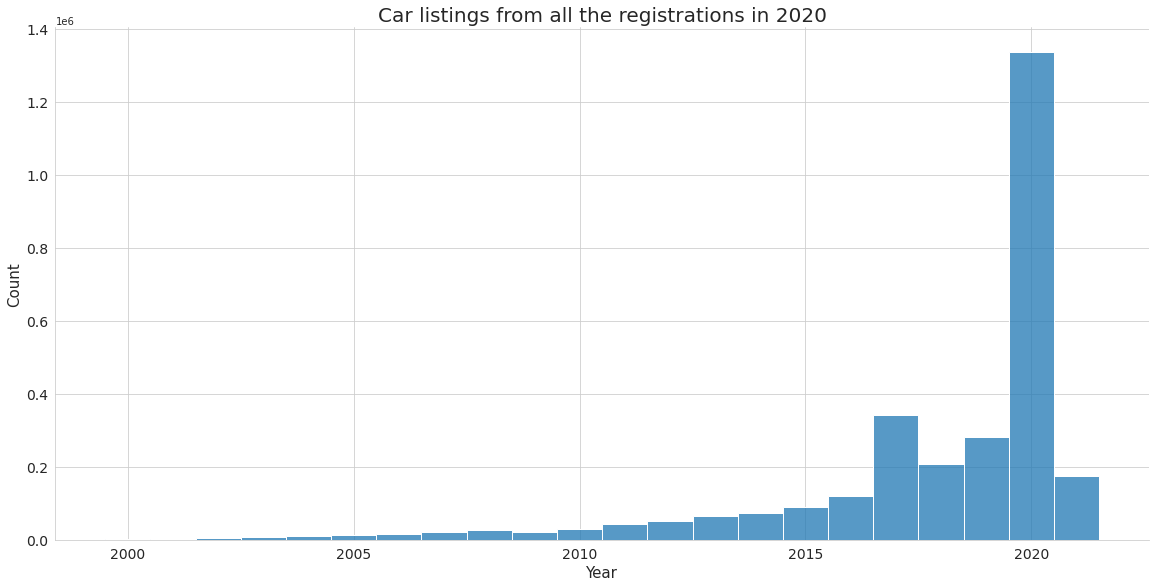

In [43]:
year = df[df['year'] >= 2000] #creating a df where car registered is >= year 2000

#plotting the graph
q = sns.displot(x=year.year, bins=50, discrete=True, height=8, aspect=2)
#q.set(title = 'Car listings from all the registrations in 2020')

plt.xlabel('Year', fontsize=15);
plt.ylabel('Count', fontsize=15);
plt.tick_params(axis='both', which='major', labelsize=14)
#sns.set(font_scale=0.1)
plt.title('Car listings from all the registrations in 2020', fontsize=20)
plt.show() 

So, it is seen from the above graph that most car listings (over 1.2 million) are from car registered in 2020 followed by 2017 & 2019.

#### Let us look at the variation of maximum_seating that these second hand cars have.



In [44]:
maxseats = df['maximum_seating'].value_counts()

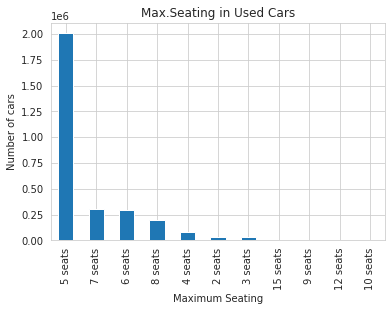

In [45]:
maxseats.plot.bar()
plt.title("Max.Seating in Used Cars");
plt.xlabel("Maximum Seating");
plt.ylabel("Number of cars");

## Relation of price with body_type, fuel_type and is_new

In [46]:
df6 = df[df['price'] > 70000] #checking how many cars cost in excess of $70,000
df6.vin.value_counts().sum()

73350

The average cost of new car at the end of 2020 in US was around 40,000 US dollars. In our dataset, there are 73350 car with the value higher than $70,000.

Text(0, 0.5, 'Average Price')

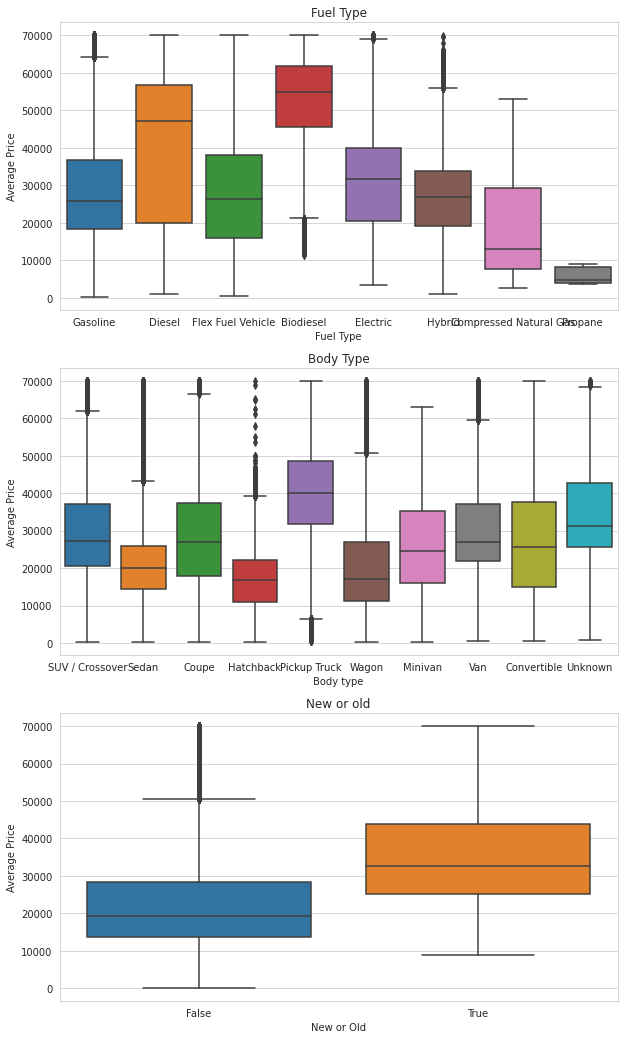

In [47]:
df4 = df[df['price'] < 70000] # creating another df where price < 70000

#plotting the graphs

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# fuel_type
fig =sns.boxplot(ax=axes[0], y=df4['price'], x=df4['fuel_type'])
axes[0].set_title('Fuel Type')
fig.set_xlabel('Fuel Type', fontsize = 10)
fig.set_ylabel('Average Price', fontsize = 10)

# body_type
fig1 = sns.boxplot(ax=axes[1], y=df4['price'], x=df4['body_type'])
axes[1].set_title('Body Type')
fig1.set_xlabel('Body type', fontsize = 10)
fig1.set_ylabel('Average Price', fontsize = 10)

# is_new
fig2 = sns.boxplot(ax=axes[2], y=df4['price'], x=df4['is_new'])
axes[2].set_title('New or old')
fig2.set_xlabel('New or Old', fontsize = 10)
fig2.set_ylabel('Average Price', fontsize = 10)
#plt.gcf().set_size_inches(27, 10)

The average price of gasoline and hybrid vehicles are almost same. Electric are more expensive than gasoline and hybrid vehicles. Pickup trucks are more expensive compared to other body types and, the prices of the newer vehicles are higher than the older ones which is quite obvious as well. 

# Asking and Answering Questions

Let's ask specific questions and try answering them using data frame operations and visualizations. I have already gained some few insights about the US used car market by exploring some invididual columns of the dataset. 

## Q1: What are the highest listings for top 20 car brands?
We'll have to use the **value_counts** data frame method to count the total number of listings by car brand and then use **head** method to get the top 20 values only.

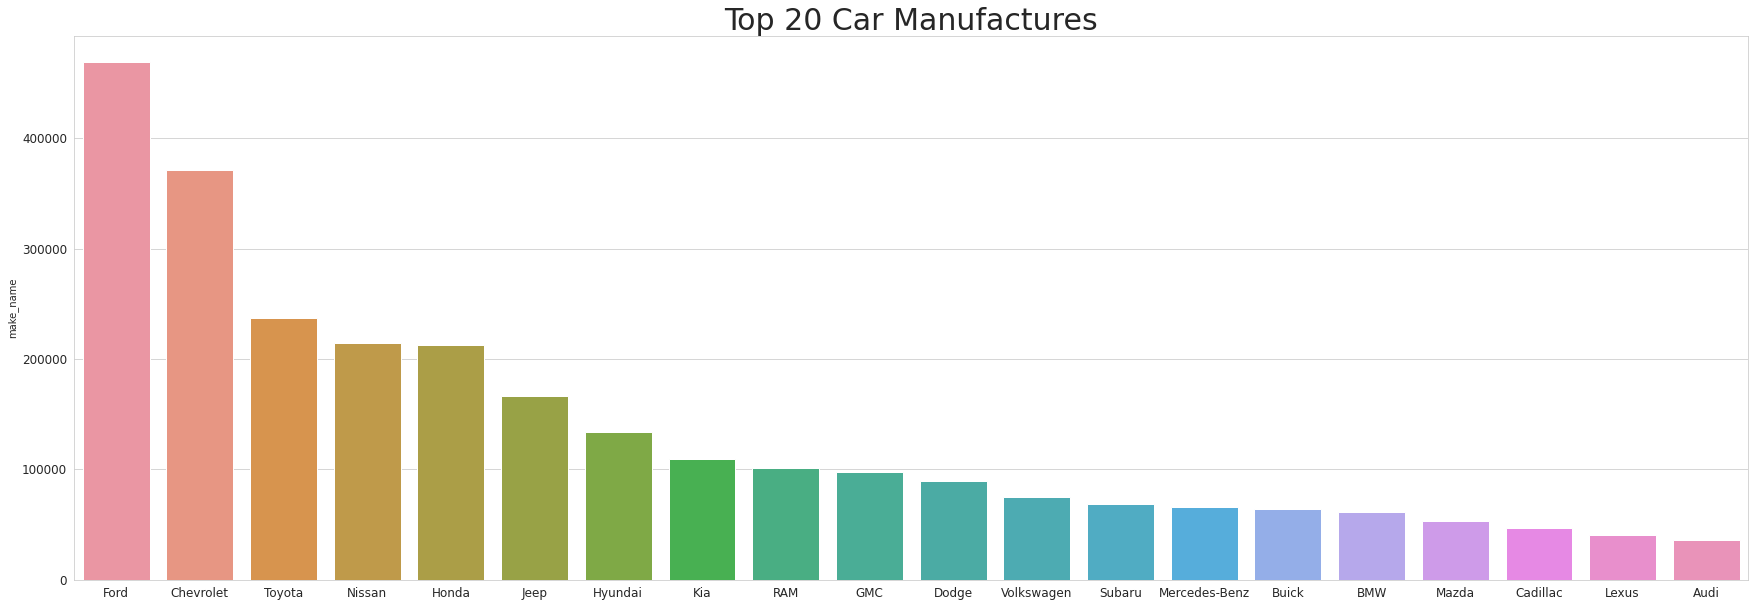

In [48]:
make_name_df = df.make_name.value_counts().head(20) #creating a df with top 20 car manufactures by highest number of listings

#plotting the graph
plt.figure(figsize=(30,10)) #setting the graph size
g = sns.barplot(x=make_name_df.index, y=make_name_df);
g.axes.set_title('Top 20 Car Manufactures',fontsize=30)
g.tick_params(labelsize=12)


It does not come as a surprise as Ford is one of the most popular car brands in the US. In 2020, Ford delivered about 1.9 million units to US customers. Chevrolet & Toyota also have a high number of cars listed. It will be interesting to see if we exclude the new vehicles from the data, will the result be any different? Let's analyze

## Q2: Only from the old car listings, What is the impact on the top 20 car brands? 

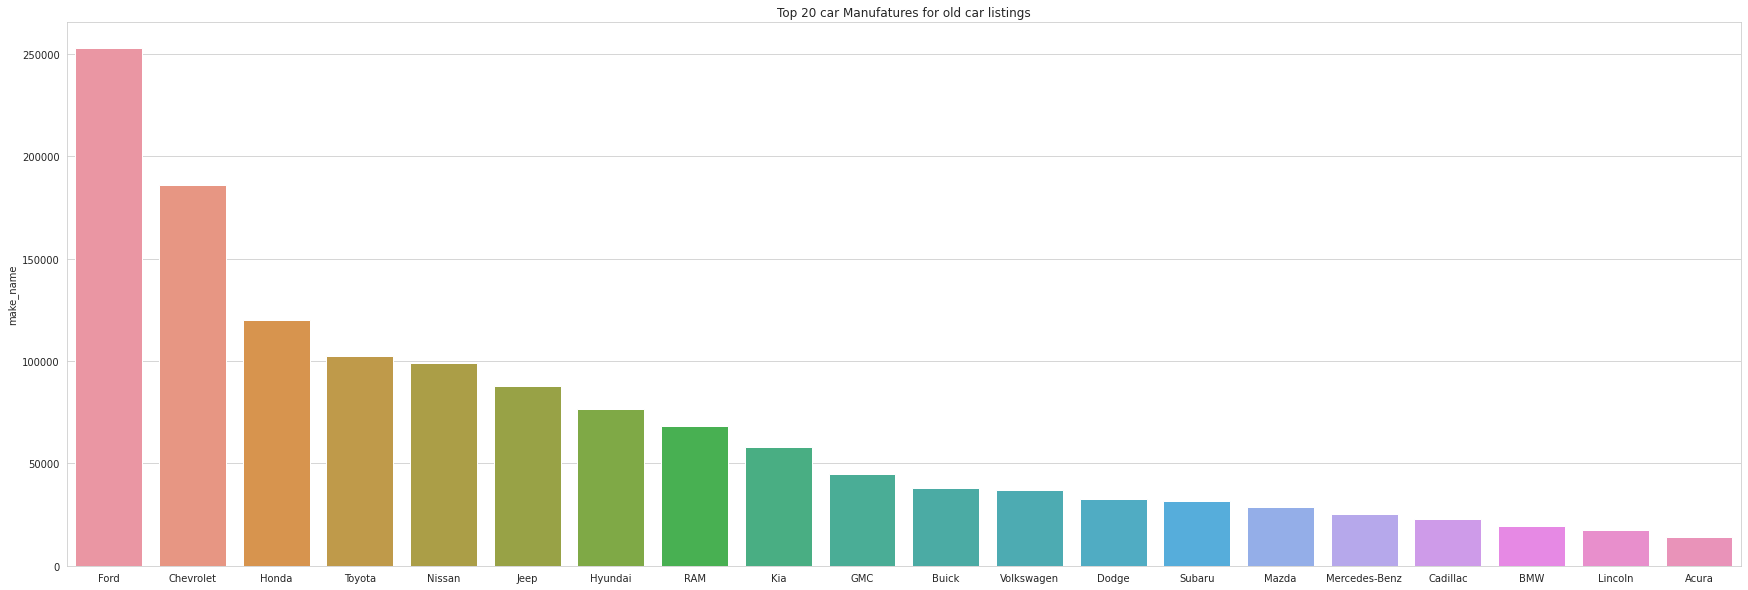

In [49]:
old = df[df['is_new'] == True]
old_df = old.make_name.value_counts().head(20)

#plotting the graph
plt.figure(figsize=(30,10)) #setting the graph size
sns.barplot(x=old_df.index, y=old_df).set_title('Top 20 car Manufatures for old car listings');

The only change was Audi was replced by Chrysler and, the top 6 car brands remained the same. Ford has just over 250K listings meaning over 50% of the listings in the previous graph were of new cars. Removing the new cars didn't make a huge difference to the top 20 car brands list. 

## Q3: Which Car brand was mostly bought by US consumers in the US used car market?
Let's analyze the amount of time it takes to sell a car by brand on average. I'm going to show top 10 and bottom 10 in two different graphs.

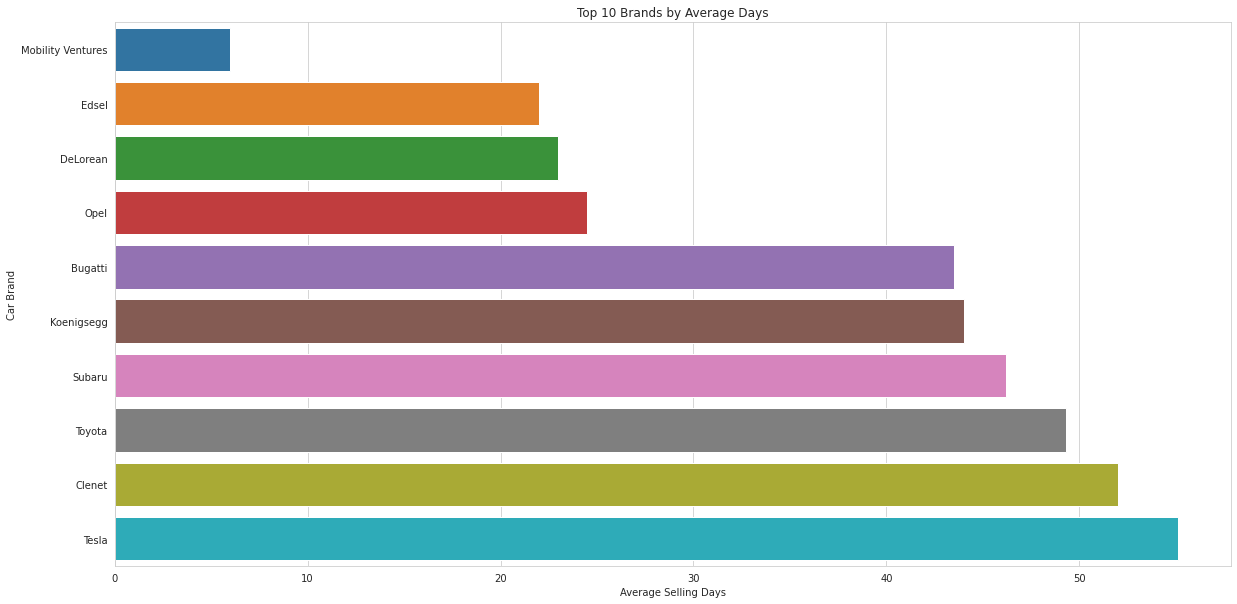

In [50]:
brand_df = df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=True).head(10) #creating df
#plotting the graph
plt.figure(figsize=(20, 10))
b = sns.barplot(y=brand_df.index, x=brand_df).set_title('Top 10 Brands by Average Days')
plt.xlabel('Average Selling Days')
plt.ylabel('Car Brand');

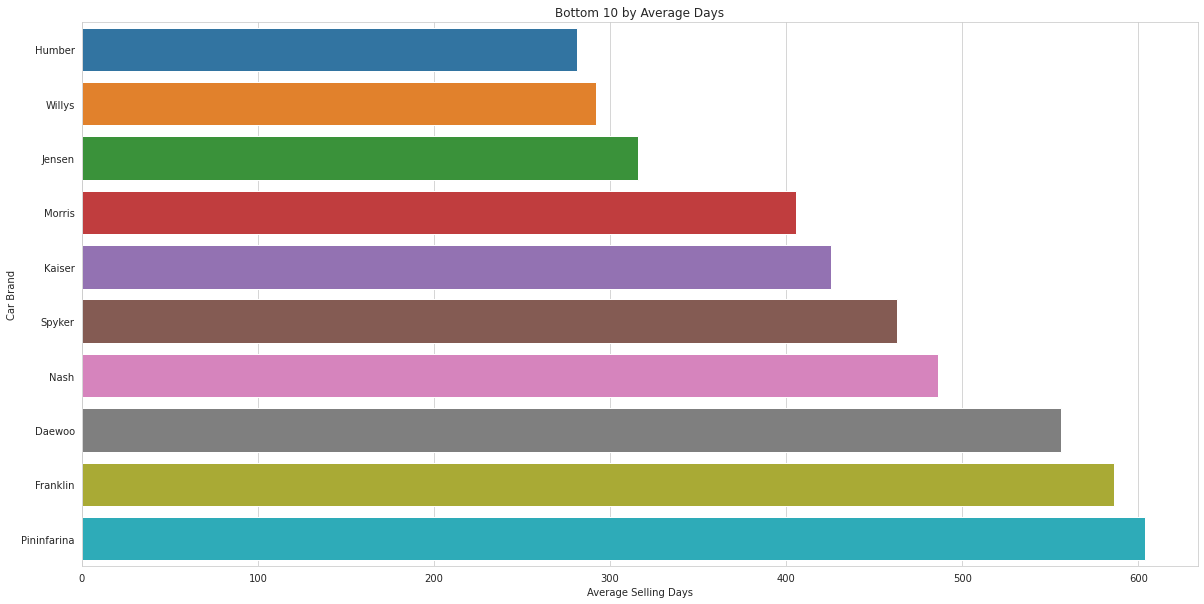

In [51]:
brand1_df = df.groupby('make_name')['daysonmarket'].mean().sort_values(ascending=True).tail(10) #creating df
#plotting the graph
plt.figure(figsize=(20, 10))
b = sns.barplot(y=brand1_df.index, x=brand1_df).set_title('Bottom 10 by Average Days')
plt.xlabel('Average Selling Days')
plt.ylabel('Car Brand');

We can't just assume that the only factor is based only on how long it takes to sell these cars. We also need to take into account other parameters like the number of listings by the brand. Maybe "Mobility Venture" had very few listings that impacted favourably on its average selling days. We need to visualize this information again by adding a few more matrices to get a better insight. If we say "Mobility Ventures", "Edsel", "DeLorean", & "Opel" are the most popular car brands because it takes less than 25 days to sell, it would not be completely true. 

## Q4: Based on by Brands, how does the car prices vary?

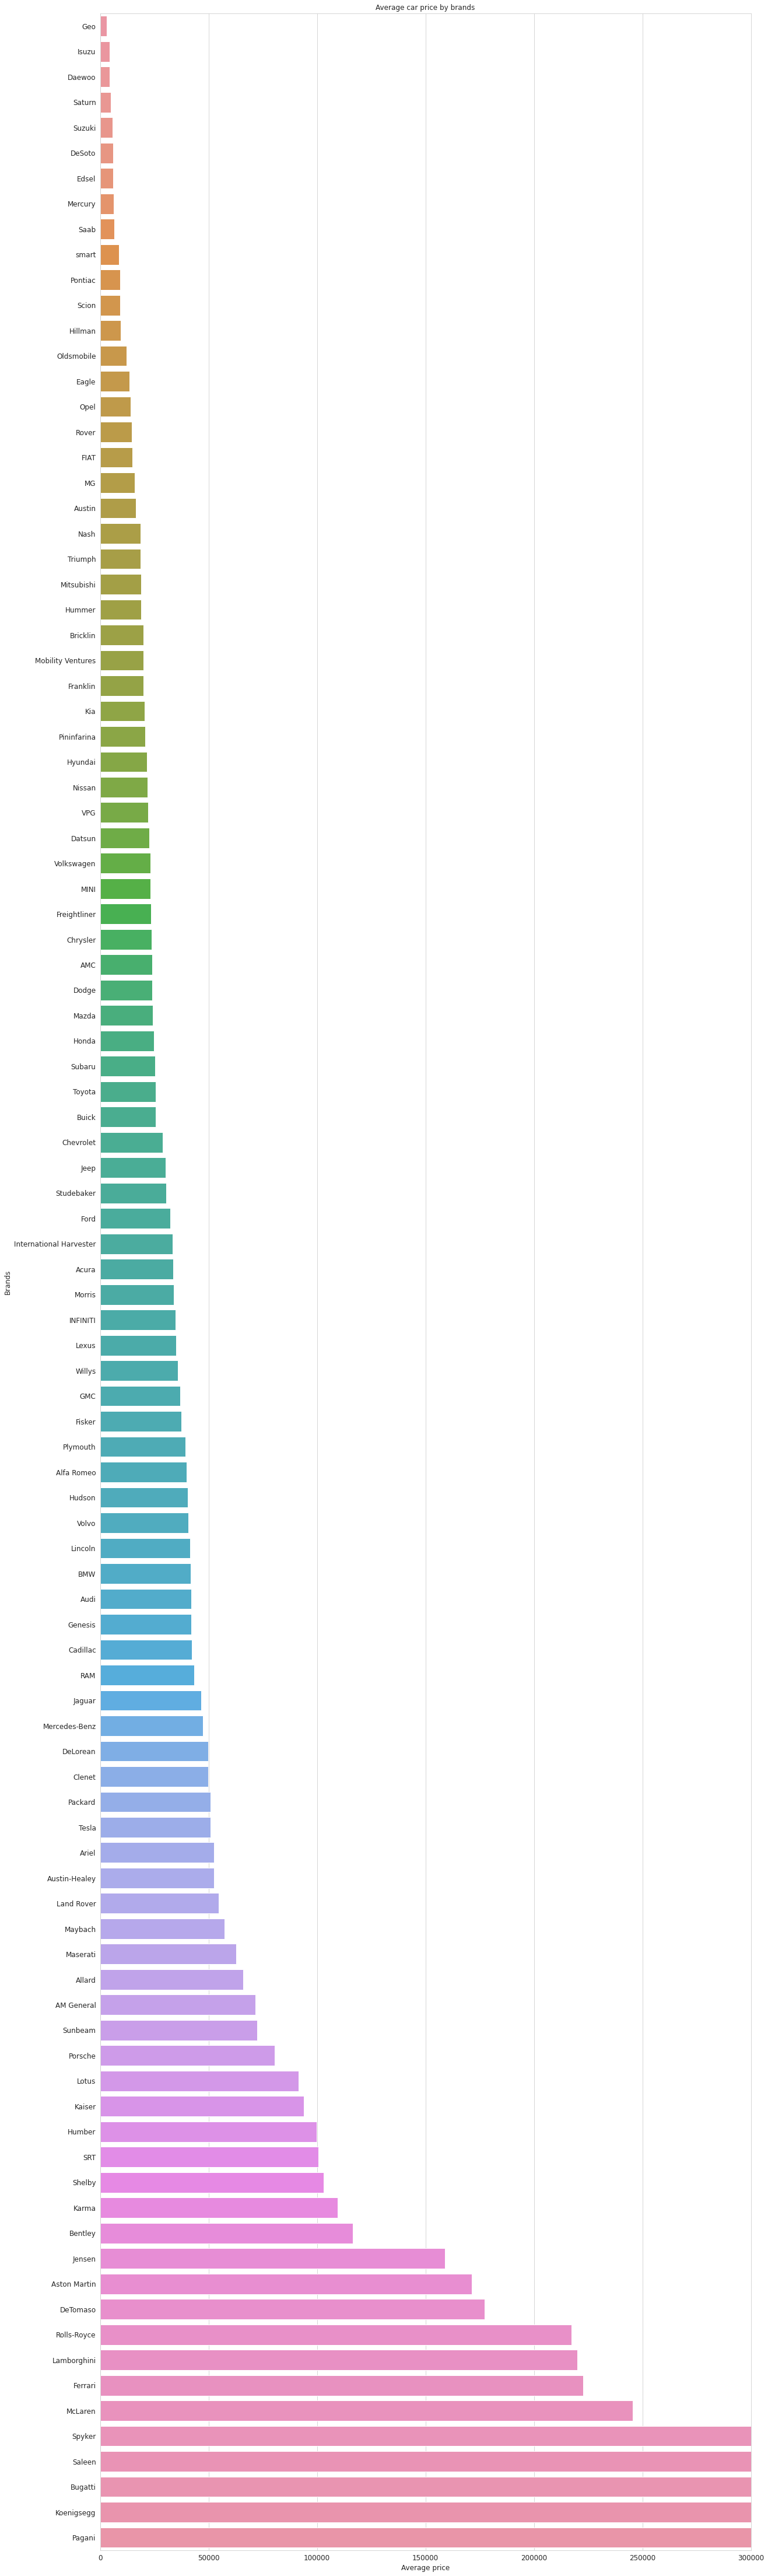

In [52]:
avg_price_df = df.groupby('make_name')['price'].mean().sort_values(ascending=True) #creating a df

#plotting the graph
plt.figure(figsize=(20, 80))
sns.barplot(y=avg_price_df.index, x=avg_price_df).set_title('Average car price by brands')
plt.ylabel('Brands', fontsize =12)
plt.xlabel('Average price', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(0,300000);


From the above graph, The average prices of the luxury cars like Pagani, koenigsegg, Bugatti etc are highly priced. Geo, Isuzu, Daewoo are one of the most affordable cars in the market.

## Q5: What are the highest number of listings by city?
Let's check top 20 cities with the highest number of listings and plot them in the chart. We can identify the cities with the highest number of car listings using the `value_counts` method and visualize using a bar chart.

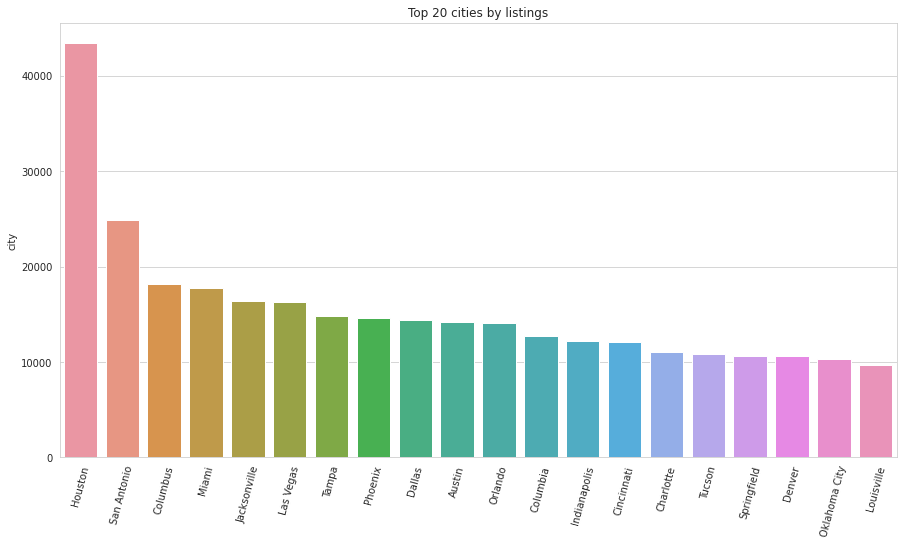

In [53]:
#copy the original df
city_df = df.copy()
#creating top 20 cities by listing df
top_cities = city_df.city.value_counts().head(20)

#plotting the chart
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
sns.barplot(x=top_cities.index, y=top_cities).set_title('Top 20 cities by listings');

It is quite interesting to see that New York has not appeared on the top 20 list with most listings. We can see that Houston has almost double the number of cars for sale compared to the next best city of San Antonio. Let's check if New York exist in the data.  Well, New York does exist in the data frame but, it is surprising to see it has only 1065 listings. Given that New York is the most populated city in the US, It should have had more listings. It requires further research to identify the reasons behind the low number of listings in New York.

In [54]:
nycity_1 = city_df[city_df['city']=='New York'] #creating a df where city valueis equal to 'New York'.
nycity_1.city.value_counts() # counting the number of listings.

New York    1065
Name: city, dtype: int64

## Q6: How long does it take to sell the used car and What type of vehicle is actively sold on the market?


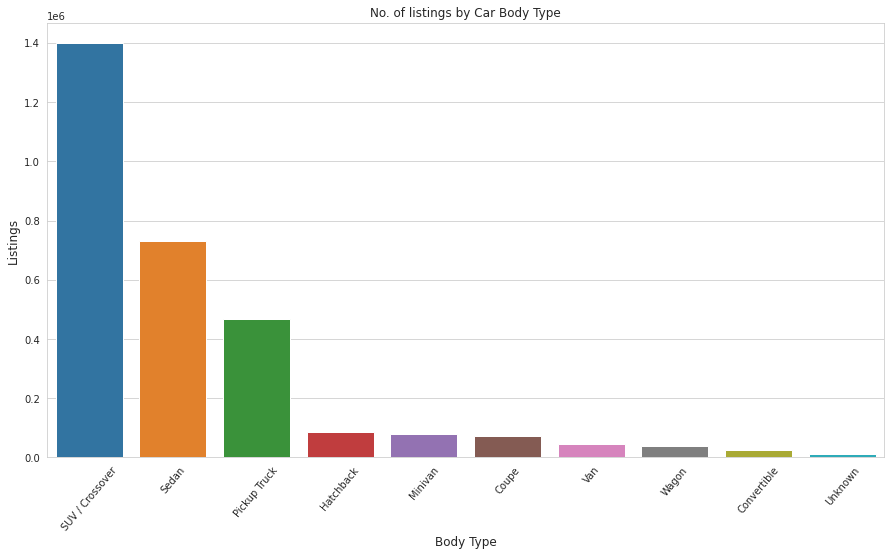

In [55]:
body_type_df = df.body_type.value_counts() #creating a data frame

#plotting the graph
plt.figure(figsize=(15,8))
plt.xticks(rotation=50)
sns.barplot(x=body_type_df.index, y=body_type_df).set_title('No. of listings by Car Body Type')
plt.xlabel('Body Type', fontsize=12)
plt.ylabel('Listings', fontsize=12);

Most common type of car for sale is 'SUV/Crossover'. Now let's check long does this car is in the market before the sale.

#### Quickest selling bodytype in the used car market

Text(0.5, 1.0, 'Fastest moving bodytype')

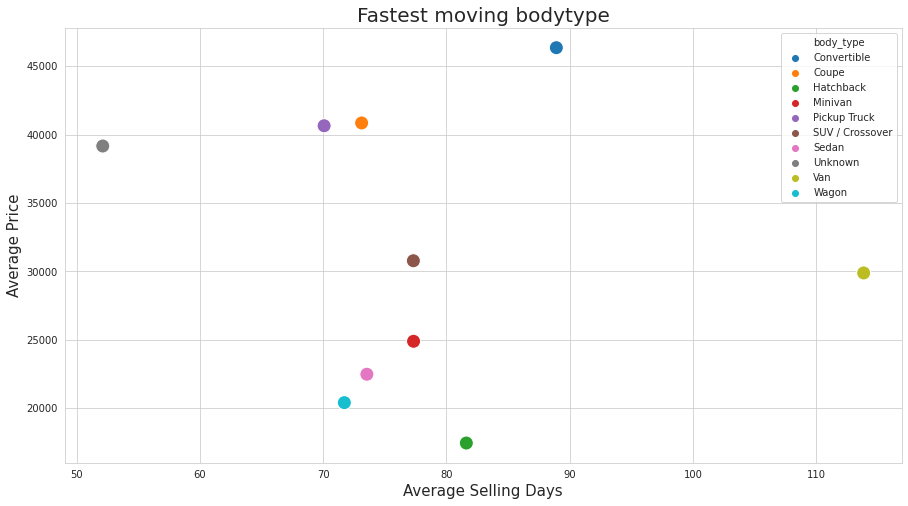

In [56]:
daysonmarket_df = df.groupby(df.body_type).mean()
plt.figure(figsize=(15,8))
sns.scatterplot(x=daysonmarket_df.daysonmarket, y=daysonmarket_df.price, s =200, hue= daysonmarket_df.index)
plt.xlabel('Average Selling Days',fontsize=15)
plt.ylabel('Average Price',fontsize=15);
plt.title('Fastest moving bodytype',fontsize=20)

The quickest selling body_type car is 'Pickup Truck' if we exclude the 'Unknown' type and 'Van' takes longest to sell. On an average, SUV/Crossover takes around 77 days to sell. 

## Q7: How varying the car prices are on different months during the course of an year? 

In [57]:
date_df = df.copy() #creat df

#Creating a month and year column based on listed date
date_df['month'] = date_df['listed_date'].dt.month 
date_df['listed_year'] = date_df['listed_date'].dt.year 

#Exclude the outliers 
date_df = date_df[(date_df.price < 70000) & (date_df.listed_year > 2012)]

#Grouping the df by listed year and month, getting average price and resetting the df index
date_df1 = date_df.groupby(['listed_year', 'month'])['price'].mean()
date_df2 = date_df1.reset_index()

#plotting the graph using plotly

fig = px.line(date_df2, x='month', y= 'price', color='listed_year', title='Average car price by month', width=600, height=400) 
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Price'
)
fig.show()

During the first quarter of 2020, prices were higher compared to 2019. However, there was a dip in April & May before it improved. In November 2013, average car prices were the highest in all years. There could be any number of reason for the price increase. Overall, the average cost of the car is trending up over the years.  

## Q8: On a Geometry map, How does the used car market vary all across the US (in all regions)?

We can use a map to visualize location information. As We have over 3 million rows of data, plotting them all on the map would not be possible. We'll create a map with 100,000 sample data records.The location of the car is the most critical piece of the puzzle that can affect the listing price and the number of days it takes to sell. 

In [58]:
loc_df = df.sample(100000) #creating dataframe with 200,000 sample data.

#importing the required library
from folium import plugins
from folium.plugins import HeatMap

#Make the list of Lat an Lng
lat = loc_df.latitude.tolist()
lng = loc_df.longitude.tolist()

#Create the map
map = folium.Map(location=[41.3883, -89.4652], zoom_start=4.5)
HeatMap(list(zip(lat, lng))).add_to(map)
map

From what we can see from the heat map, there are more listings in the East of the US and mainly around East Coast. If you're in the East Coast area, you'll have more options to choose from when buying the car. The likihood getting sold in east is higher than in the west. 

## Q9: Which brands are more popular that are being sold in used car market?


In [59]:
df = df[['make_name']]
df = df.make_name.value_counts().head(30).sort_values(ascending = True)
df = pd.DataFrame(df)

Text(0.5, 1.0, 'Number of Cars per Brand in Used Car Market')

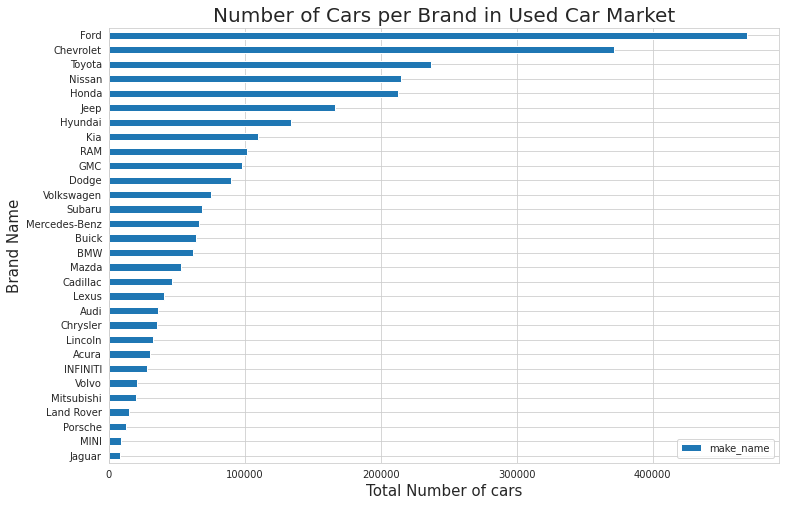

In [60]:
df.plot(kind='barh',figsize=(12,8));
plt.xlabel('Total Number of cars', fontsize= 15)
plt.ylabel('Brand Name', fontsize= 15)
plt.title('Number of Cars per Brand in Used Car Market',fontsize=20)

The Top brands- Ford comes at the top postion in terms of of popularity, Chevrolet takes in the second position and Toyota stands at the third position. Please have a look at the above bar chart to check in other brands as well. 

In [61]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sanjaynycws/eda-project-used-cars


'https://jovian.ai/sanjaynycws/eda-project-used-cars'

# Summary
* Seasonality does not really affect the price of the car. So, it does not matter in which year/month buying or selling the used car happens. 
* US East Coast is the most active when it comes to used car listings. If you're based out of the east coast, you are more likely to have more options to select a car as compared to West Coast.
* Houston has the highest number of listings in the US used car market. It was quite shocking to see only 1065 listings for New York. This requires further investigation.
* Toyota, Ford and Chevrolet has the most number of listings in the market and the car with most listing has SUV/Crossover body type.
* The majority of the cars are listed is either 'White' or 'Black' in color and are 5 seater.
* On average the car stays in the market for 75 days before getting sold. Pick up trucks are faster moving as it takes around 70 days and the van are the slow moving vehicals which takes more than 100 days on average.
* Majority of the listed car owners are registered in the year 2020. Prices of the new cars are relatively higher. If some one is looking for a more affordable vehicle then used car older than 2 years is the way to go.


## Future work
* Asking more questions, specific to certain users or types of cars to go deep into my market analysis
* The Actual data set has 66 columns so analysing with more columns will give better insights and clarity.
* Price relation with respective to horsepower and transmission etc. could give better understaning on how it may affect the used car price.
* Analyzing the location/city and checking which days of the week has more listings?
* How will the Pick up truck sales affect if we also include the listing of top 10 cities by population?  
* Visualising and deriving more relationships out of the given dataset which can help the customer to take better decisions on how/when to buy/sell a used car.


## Reference

* https://www.kaggle.com/ananaymital/us-used-cars-dataset
* https://matplotlib.org
* https://github.com/JovianML/opendatasets
* https://en.wikipedia.org/wiki/Exploratory_data_analysis
* https://seaborn.pydata.org/index.html
* https://stackoverflow.com/questions/49984575/is-there-a-limit-to-plotting-markers-with-folium
* https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study
*  https://jovian.ai/aakashns/python-pandas-data-analysis
* https://jovian.ai/aakashns/python-matplotlib-data-visualization

 


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
